In [1]:
from sklearn.naive_bayes import MultinomialNB # Import GaussianClassifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module foranalysis
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.metrics import confusion_matrix #to get access to confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay# to get a display
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import math
from sklearn.linear_model import LogisticRegression
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import seaborn as sns

# Preparing Data

In [2]:
import pandas as pd
cols = ["Class", "Cap Diameter", "Cap Shape", "Cap Surafce","Cap Color","Bruise/Bleeds",
       "Gill Attachment", "Gill Spacing", "Gill Color", "Stem Height", "Stem Width", "Stem Root",
       "Stem Surface", "Stem Color", "Veil Type", "Veil Color", "Has Ring", "Ring Type",
       "Spore Print Color", "Habitat", "Season"]
data = pd.read_csv("secondary_data.csv", sep =";", header=None, names = cols)
#take a peek to see if this looks right
data.head()

,Class,Cap Diameter,Cap Shape,Cap Surafce,Cap Color,Bruise/Bleeds,Gill Attachment,Gill Spacing,Gill Color,Stem Height,...,Stem Root,Stem Surface,Stem Color,Veil Type,Veil Color,Has Ring,Ring Type,Spore Print Color,Habitat,Season
0,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
1,p,15.26,x,g,o,f,e,NaN,w,16.95,...,s,y,w,u,w,t,g,NaN,d,w
2,p,16.6,x,g,o,f,e,NaN,w,17.99,...,s,y,w,u,w,t,g,NaN,d,u
3,p,14.07,x,g,o,f,e,NaN,w,17.8,...,s,y,w,u,w,t,g,NaN,d,w
4,p,14.17,f,h,e,f,e,NaN,w,15.77,...,s,y,w,u,w,t,p,NaN,d,w


In [3]:
data = data.drop([0])
data.head()

,Class,Cap Diameter,Cap Shape,Cap Surafce,Cap Color,Bruise/Bleeds,Gill Attachment,Gill Spacing,Gill Color,Stem Height,...,Stem Root,Stem Surface,Stem Color,Veil Type,Veil Color,Has Ring,Ring Type,Spore Print Color,Habitat,Season
1,p,15.26,x,g,o,f,e,NaN,w,16.95,...,s,y,w,u,w,t,g,NaN,d,w
2,p,16.6,x,g,o,f,e,NaN,w,17.99,...,s,y,w,u,w,t,g,NaN,d,u
3,p,14.07,x,g,o,f,e,NaN,w,17.8,...,s,y,w,u,w,t,g,NaN,d,w
4,p,14.17,f,h,e,f,e,NaN,w,15.77,...,s,y,w,u,w,t,p,NaN,d,w
5,p,14.64,x,h,o,f,e,NaN,w,16.53,...,s,y,w,u,w,t,p,NaN,d,w


In [4]:
data

,Class,Cap Diameter,Cap Shape,Cap Surafce,Cap Color,Bruise/Bleeds,Gill Attachment,Gill Spacing,Gill Color,Stem Height,...,Stem Root,Stem Surface,Stem Color,Veil Type,Veil Color,Has Ring,Ring Type,Spore Print Color,Habitat,Season
1,p,15.26,x,g,o,f,e,NaN,w,16.95,...,s,y,w,u,w,t,g,NaN,d,w
2,p,16.6,x,g,o,f,e,NaN,w,17.99,...,s,y,w,u,w,t,g,NaN,d,u
3,p,14.07,x,g,o,f,e,NaN,w,17.8,...,s,y,w,u,w,t,g,NaN,d,w
4,p,14.17,f,h,e,f,e,NaN,w,15.77,...,s,y,w,u,w,t,p,NaN,d,w
5,p,14.64,x,h,o,f,e,NaN,w,16.53,...,s,y,w,u,w,t,p,NaN,d,w
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61065,p,1.18,s,s,y,f,f,f,f,3.93,...,NaN,NaN,y,NaN,NaN,f,f,NaN,d,a
61066,p,1.27,f,s,y,f,f,f,f,3.18,...,NaN,NaN,y,NaN,NaN,f,f,NaN,d,a
61067,p,1.27,s,s,y,f,f,f,f,3.86,...,NaN,NaN,y,NaN,NaN,f,f,NaN,d,u
61068,p,1.24,f,s,y,f,f,f,f,3.56,...,NaN,NaN,y,NaN,NaN,f,f,NaN,d,u


In [5]:
data.describe()

,Class,Cap Diameter,Cap Shape,Cap Surafce,Cap Color,Bruise/Bleeds,Gill Attachment,Gill Spacing,Gill Color,Stem Height,...,Stem Root,Stem Surface,Stem Color,Veil Type,Veil Color,Has Ring,Ring Type,Spore Print Color,Habitat,Season
count,61069,61069,61069,46949,61069,61069,51185,36006,61069,61069.0,...,9531,22945,61069,3177,7413,61069,58598,6354,61069,61069
unique,2,4444,7,11,12,2,7,3,12,3779.0,...,5,8,13,1,6,2,8,7,8,4
top,p,3.14,x,t,n,f,a,c,w,0.0,...,s,s,w,u,w,f,f,k,d,a
freq,33888,65,26934,8196,24218,50479,12698,24710,18521,1059.0,...,3177,6025,22926,3177,5474,45890,48361,2118,44209,30177


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61069 entries, 1 to 61069
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Class              61069 non-null  object
 1   Cap Diameter       61069 non-null  object
 2   Cap Shape          61069 non-null  object
 3   Cap Surafce        46949 non-null  object
 4   Cap Color          61069 non-null  object
 5   Bruise/Bleeds      61069 non-null  object
 6   Gill Attachment    51185 non-null  object
 7   Gill Spacing       36006 non-null  object
 8   Gill Color         61069 non-null  object
 9   Stem Height        61069 non-null  object
 10  Stem Width         61069 non-null  object
 11  Stem Root          9531 non-null   object
 12  Stem Surface       22945 non-null  object
 13  Stem Color         61069 non-null  object
 14  Veil Type          3177 non-null   object
 15  Veil Color         7413 non-null   object
 16  Has Ring           61069 non-null  objec

In [7]:
class_mapping = {'e': 0, 'p': 1}
data["Class"] = data["Class"].map(class_mapping)
data

,Class,Cap Diameter,Cap Shape,Cap Surafce,Cap Color,Bruise/Bleeds,Gill Attachment,Gill Spacing,Gill Color,Stem Height,...,Stem Root,Stem Surface,Stem Color,Veil Type,Veil Color,Has Ring,Ring Type,Spore Print Color,Habitat,Season
1,0,15.26,x,g,o,f,e,NaN,w,16.95,...,s,y,w,u,w,t,g,NaN,d,w
2,0,16.6,x,g,o,f,e,NaN,w,17.99,...,s,y,w,u,w,t,g,NaN,d,u
3,0,14.07,x,g,o,f,e,NaN,w,17.8,...,s,y,w,u,w,t,g,NaN,d,w
4,0,14.17,f,h,e,f,e,NaN,w,15.77,...,s,y,w,u,w,t,p,NaN,d,w
5,0,14.64,x,h,o,f,e,NaN,w,16.53,...,s,y,w,u,w,t,p,NaN,d,w
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61065,0,1.18,s,s,y,f,f,f,f,3.93,...,NaN,NaN,y,NaN,NaN,f,f,NaN,d,a
61066,0,1.27,f,s,y,f,f,f,f,3.18,...,NaN,NaN,y,NaN,NaN,f,f,NaN,d,a
61067,0,1.27,s,s,y,f,f,f,f,3.86,...,NaN,NaN,y,NaN,NaN,f,f,NaN,d,u
61068,0,1.24,f,s,y,f,f,f,f,3.56,...,NaN,NaN,y,NaN,NaN,f,f,NaN,d,u


In [8]:
data = data.drop(columns=["Stem Root", "Veil Type", "Veil Color", "Spore Print Color"])


In [9]:
categorical_columns = ["Cap Shape", "Cap Surafce","Bruise/Bleeds",
       "Gill Attachment", "Gill Spacing",  
       "Stem Surface", "Has Ring", "Ring Type",
        "Habitat", "Season"]#can add more columns if there were more categorical columns
for column in categorical_columns:
    dummies = pd.get_dummies(data[column])#create a dataframe with the new dummy columns
    data = pd.concat([ dummies, data], axis=1)#concatenate the new dummy columns with the old dataframe
    data = data.drop(columns=column)#get rid of the old categorical column
data #optional if want to see it

,a,s,u,w,d,g,h,l,m,p,...,p,s,x,Class,Cap Diameter,Cap Color,Gill Color,Stem Height,Stem Width,Stem Color
1,0,0,0,1,1,0,0,0,0,0,...,0,0,1,0,15.26,o,w,16.95,17.09,w
2,0,0,1,0,1,0,0,0,0,0,...,0,0,1,0,16.6,o,w,17.99,18.19,w
3,0,0,0,1,1,0,0,0,0,0,...,0,0,1,0,14.07,o,w,17.8,17.74,w
4,0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,14.17,e,w,15.77,15.98,w
5,0,0,0,1,1,0,0,0,0,0,...,0,0,1,0,14.64,o,w,16.53,17.2,w
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61065,1,0,0,0,1,0,0,0,0,0,...,0,1,0,0,1.18,y,f,3.93,6.22,y
61066,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1.27,y,f,3.18,5.43,y
61067,0,0,1,0,1,0,0,0,0,0,...,0,1,0,0,1.27,y,f,3.86,6.37,y
61068,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1.24,y,f,3.56,5.44,y


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61069 entries, 1 to 61069
Data columns (total 67 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   a             61069 non-null  uint8 
 1   s             61069 non-null  uint8 
 2   u             61069 non-null  uint8 
 3   w             61069 non-null  uint8 
 4   d             61069 non-null  uint8 
 5   g             61069 non-null  uint8 
 6   h             61069 non-null  uint8 
 7   l             61069 non-null  uint8 
 8   m             61069 non-null  uint8 
 9   p             61069 non-null  uint8 
 10  u             61069 non-null  uint8 
 11  w             61069 non-null  uint8 
 12  e             61069 non-null  uint8 
 13  f             61069 non-null  uint8 
 14  g             61069 non-null  uint8 
 15  l             61069 non-null  uint8 
 16  m             61069 non-null  uint8 
 17  p             61069 non-null  uint8 
 18  r             61069 non-null  uint8 
 19  z   

In [11]:
class colorRGB:
    def __init__(self, r, g, b):
        self.r = r
        self.g = g
        self.b = b

brown = colorRGB(165,42,42)
buff = colorRGB(218, 160, 109)
gray = colorRGB(128,128,128)
green = colorRGB(0, 128, 0)
pink = colorRGB(255,192,203)
purple = colorRGB(128,0,128)
red = colorRGB(139,0,0)
white = colorRGB(0,0,0)
yellow = colorRGB(255,255,153)
blue = colorRGB(0,32,255)
orange = colorRGB(255,165,0)
black = colorRGB(255,255,255)
none = colorRGB(10000, 10000, 10000) #This is a N/A color

In [12]:
def colorMatch(c):
    '''
    Maps colors to their appropriate naming schema in the dataset
    
    returns appropriate instance of a colorRGB object
    '''
    # returns a dictionary search of parameter c
    return {
        'n': brown,
        'b': buff,
        'g': gray,
        'r': green,
        'p': pink,
        'u': purple,
        'e': red,
        'w': white,
        'y': yellow,
        'l': blue,
        'o': orange,
        'k': black,
        'f': none
    }[c]

In [13]:
# RGB columns to Cap Color
col_r = []
col_g = []
col_b = []


for color in data['Cap Color']:
    c = colorMatch(color)
    col_r.append(c.r)
    col_g.append(c.g)
    col_b.append(c.b)
    
data["Cap Color R"] = col_r
data["Cap Color G"] = col_g
data["Cap Color B"]= col_b


# RGB columns to Gill Color
col_r.clear()
col_g.clear()
col_b.clear()

for color in data['Gill Color']:
    c = colorMatch(color)
    col_r.append(c.r)
    col_g.append(c.g)
    col_b.append(c.b)
    
data["Gill Color R"] = col_r
data["Gill Color G"] = col_g
data["Gill Color B"]= col_b


# RGB columns to Stem Color
col_r.clear()
col_g.clear()
col_b.clear()

for color in data['Stem Color']:
    c = colorMatch(color)
    col_r.append(c.r)
    col_g.append(c.g)
    col_b.append(c.b)
    
data["Stem Color R"] = col_r
data["Stem Color G"] = col_g
data["Stem Color B"]= col_b


data = data.drop(columns=["Cap Color", "Gill Color", "Stem Color"])

data

,a,s,u,w,d,g,h,l,m,p,...,Stem Width,Cap Color R,Cap Color G,Cap Color B,Gill Color R,Gill Color G,Gill Color B,Stem Color R,Stem Color G,Stem Color B
1,0,0,0,1,1,0,0,0,0,0,...,17.09,255,165,0,0,0,0,0,0,0
2,0,0,1,0,1,0,0,0,0,0,...,18.19,255,165,0,0,0,0,0,0,0
3,0,0,0,1,1,0,0,0,0,0,...,17.74,255,165,0,0,0,0,0,0,0
4,0,0,0,1,1,0,0,0,0,0,...,15.98,139,0,0,0,0,0,0,0,0
5,0,0,0,1,1,0,0,0,0,0,...,17.2,255,165,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61065,1,0,0,0,1,0,0,0,0,0,...,6.22,255,255,153,10000,10000,10000,255,255,153
61066,1,0,0,0,1,0,0,0,0,0,...,5.43,255,255,153,10000,10000,10000,255,255,153
61067,0,0,1,0,1,0,0,0,0,0,...,6.37,255,255,153,10000,10000,10000,255,255,153
61068,0,0,1,0,1,0,0,0,0,0,...,5.44,255,255,153,10000,10000,10000,255,255,153


In [14]:
data.describe()

,a,s,u,w,d,g,h,l,m,p,...,Class,Cap Color R,Cap Color G,Cap Color B,Gill Color R,Gill Color G,Gill Color B,Stem Color R,Stem Color G,Stem Color B
count,61069.000000,61069.000000,61069.000000,61069.000000,61069.000000,61069.000000,61069.000000,61069.000000,61069.000000,61069.000000,...,61069.000000,61069.000000,61069.000000,61069.000000,61069.000000,61069.000000,61069.000000,61069.00000,61069.000000,61069.000000
mean,0.494146,0.044654,0.374953,0.086247,0.723919,0.130066,0.032766,0.051876,0.047815,0.005895,...,0.445087,155.244756,89.556633,67.559826,707.608345,675.178601,650.867642,285.87298,238.512617,222.319606
std,0.499970,0.206546,0.484115,0.280730,0.447061,0.336379,0.178026,0.221778,0.213376,0.076553,...,0.496979,82.086890,89.380295,68.456480,2304.049515,2311.780382,2317.083260,1294.23104,1299.827246,1300.462900
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,128.000000,42.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,165.000000,42.000000,42.000000,165.000000,128.000000,42.000000,165.00000,42.000000,42.000000
75%,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,218.000000,160.000000,128.000000,255.000000,255.000000,153.000000,165.00000,128.000000,109.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,255.000000,255.000000,255.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000


In [15]:
# Getting all the features into one list
all_features = []
for col in data.drop(columns=["Class"]):
    all_features.append(col)
    
len(all_features)

72

# Testing

In [16]:
X = data.drop(columns  = ["Class"])
y = data["Class"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
random_state=1)

In [17]:
def predForModel(model):
    '''
    Does the predicting for a given model
    
    param
        model: the classifier/model
        
    returns: y predictions, train predictions
    '''
    #Predict the response for test dataset
    y_pred = model.predict(X_test)
    #predict the response for the training set
    train_pred = model.predict(X_train)
    # Model Accuracy, how often is the classifier correct?
    # Are you overfitting?
    print("Accuracy train:",metrics.accuracy_score(y_train, train_pred))
    print("Accuracy test:",metrics.accuracy_score(y_test, y_pred))
    return y_pred, train_pred

# Bayesian Classifier

In [17]:
gnb = MultinomialNB()
#Train model using the training sets
gnb.fit(X_train, y_train)
#predict the response for test dataset
y_predNB = gnb.predict(X_test)

In [18]:
y_predNB, trainNB = predForModel(gnb)

Accuracy train: 0.5866707214372602
Accuracy test: 0.5880683368811747


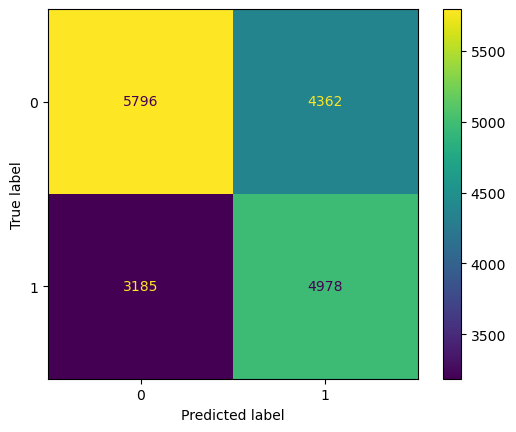

In [19]:
#Confusion Matrix
conf_mat = confusion_matrix(y_test, y_predNB)
cm_display = ConfusionMatrixDisplay(conf_mat).plot()

In [20]:
#Look at the other results
print(metrics.classification_report(y_test,y_predNB))

              precision    recall  f1-score   support

           0       0.65      0.57      0.61     10158
           1       0.53      0.61      0.57      8163

    accuracy                           0.59     18321
   macro avg       0.59      0.59      0.59     18321
weighted avg       0.60      0.59      0.59     18321



<p>By all accords, this is a very rough basline reading. Not a percentage we would like to be seeing </p>

# Support Vector Machine

In [21]:
# Creating a support vector machine classifier
svm = LinearSVC(dual='auto')
svm.fit(X_train, y_train)
yp, ytp = predForModel(svm)

Accuracy train: 0.7789136333863572
Accuracy test: 0.7692811527755036


In [22]:
# Tuning a support vector machine classifier
# adjusting the scoring harshness metric
svm = LinearSVC(dual='auto', C=10)
svm.fit(X_train, y_train)
y, ytp  = predForModel(svm)

Accuracy train: 0.7669364648638533
Accuracy test: 0.7581463893892255


In [23]:
# Tuning a support vector machine classifier
# adjusting the weights of each outcome, 0 and 1 based on data amounts
svm = LinearSVC(dual='auto', class_weight = 'balanced')
svm.fit(X_train, y_train)
y, ytp  = predForModel(svm)

Accuracy train: 0.7878965097782352
Accuracy test: 0.780961737896403


In [24]:
# Tuning a support vector machine classifier
# adjusting tolerance high
svm = LinearSVC(dual='auto', class_weight = 'balanced', tol=0.1)
svm.fit(X_train, y_train)
y, ytp  = predForModel(svm)

Accuracy train: 0.597641994947132
Accuracy test: 0.5989301894001419


In [25]:
# Tuning a support vector machine classifier
# adjusting tolerance lower
svm = LinearSVC(dual='auto', class_weight = 'balanced', tol=0.0000001)
svm.fit(X_train, y_train)
y, ytp  = predForModel(svm)

Accuracy train: 0.7859315055675119
Accuracy test: 0.7783963757436821


#### Vector Machines Conclusion
<p>Due to how vector support machines match the data, these low percentages make sense. SVM's work best for smaller sets of data that have a lot of features. Our dataset is quite large and has a medium number of features. Because of how many points there are, it will be very hard for the machine to properly model the entire data set with a set of vectors. Other methods should be able to create a better result.  </p>

# Decision Tree Classifier

In [18]:
# Create Decision Tree classifer object
dtc = DecisionTreeClassifier()
# Train Decision Tree Classifer
model = dtc.fit(X_train,y_train)
y_predDT, train_predDT = predForModel(dtc)

Accuracy train: 1.0
Accuracy test: 0.9980896239288248


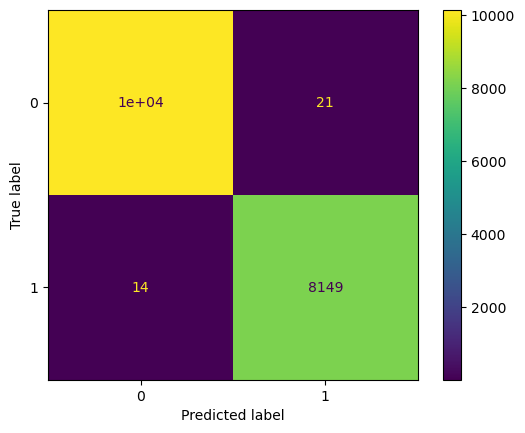

In [19]:
#Confusion Matrix
conf_mat = confusion_matrix(y_test, y_predDT)
cm_display = ConfusionMatrixDisplay(conf_mat).plot()

In [20]:
#Look at the other results
print(metrics.classification_report(y_test,y_predDT))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10158
           1       1.00      1.00      1.00      8163

    accuracy                           1.00     18321
   macro avg       1.00      1.00      1.00     18321
weighted avg       1.00      1.00      1.00     18321



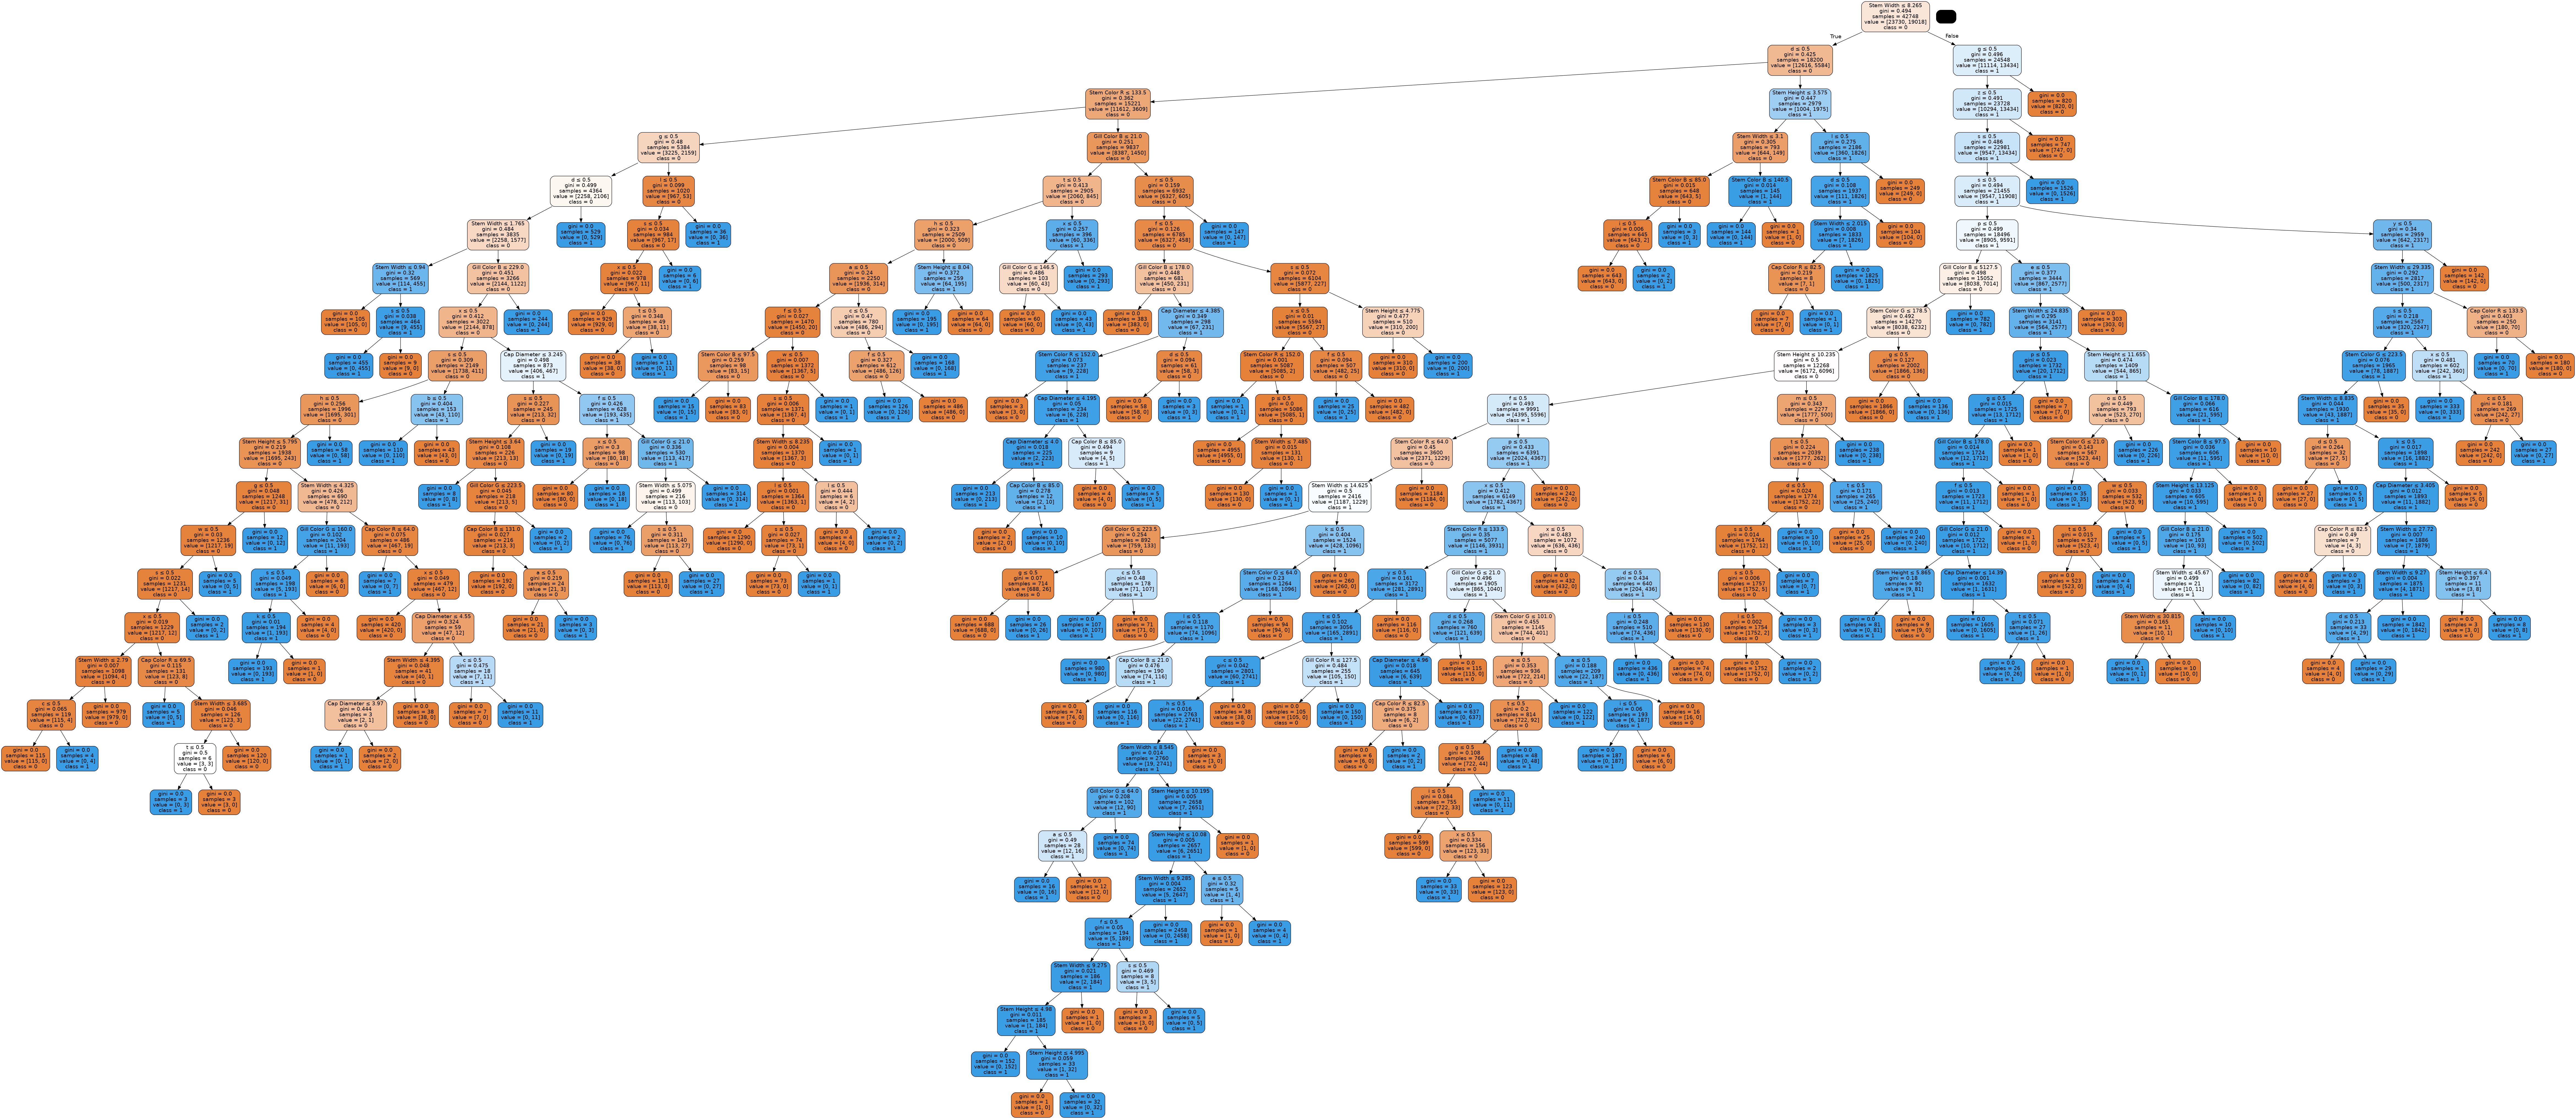

In [21]:
from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(model, out_file=dot_data,
filled=True, rounded=True,
special_characters=True, feature_names =
all_features,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
#graph.write_png('dt1.png')
Image(graph.create_png())

### What if we trim the tree, what happens?

In [22]:
def decisionTreeDepth(x):# Create Decision Tree classifer object
    '''
    Trains a decision tree with certain depth and prints it's accuracy
    
    params
        x: the depth for the tree
        
    returns the DecisionTreeClassifier Object
    '''
    short = DecisionTreeClassifier(criterion="entropy", max_depth=x)
    # Train Decision Tree Classifer
    short = short.fit(X_train,y_train)
    y_pred_short, pred_train = predForModel(short)
    return short, y_pred_short

In [23]:
s0, y0 = decisionTreeDepth(23)

Accuracy train: 1.0
Accuracy test: 0.9983625347961356


In [24]:
s1, y1 = decisionTreeDepth(22)

Accuracy train: 1.0
Accuracy test: 0.9983625347961356


In [25]:
s2, y2 = decisionTreeDepth(21)

Accuracy train: 1.0
Accuracy test: 0.9983079526226735


In [26]:
s3, y3 = decisionTreeDepth(20)

Accuracy train: 1.0
Accuracy test: 0.9982533704492113


In [27]:
s4, y4 = decisionTreeDepth(19)

Accuracy train: 0.9996023205764012
Accuracy test: 0.9974892200207413


In [28]:
s5, y5 = decisionTreeDepth(18)

Accuracy train: 0.998456068120146
Accuracy test: 0.9964521587249604


In [29]:
s6, y6 = decisionTreeDepth(17)

Accuracy train: 0.9978712454383831
Accuracy test: 0.9957425904699525


In [30]:
s7, y7 = decisionTreeDepth(10)

Accuracy train: 0.8863806493871058
Accuracy test: 0.8800829649036624


   ## K-fold Validation

In [36]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
random_state=1) # 70% training and 30% test
# Create Decision Tree classifer object
oneTree = DecisionTreeClassifier()
# Train Decision Tree Classifer
oneTree.fit(X_train,y_train)
y_pred = oneTree.predict(X_test)
# Model Accuracy, how often is the classifier correct?
print(f"Accuracy: {metrics.accuracy_score(y_test, y_pred)}")

Accuracy: 0.9980350417553627


In [56]:
from sklearn import model_selection
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import LeavePOut
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
#K-fold Cross-Validation
'''
In k-fold cross-validation, the data is divided into k folds.
The model is trained on k-1 folds with one fold held back for testing.
This process gets repeated to ensure each fold of the dataset gets the
chance to be the held back set. Once the process is completed,
we can summarize the evaluation metric using the mean or/and the standard
deviation.
'''
kfold = model_selection.KFold(n_splits=10, shuffle=True)
model_kfold = DecisionTreeClassifier()
results_kfold = model_selection.cross_val_score(model_kfold, X, y, cv=kfold, scoring='recall')
print(f"Accuracy: {results_kfold.mean()} ({results_kfold.std()})")

Accuracy: 0.998753523257979 (0.0006731774067450252)


In [55]:
#Stratified K-fold Cross-Validation
'''
Stratified K-Fold approach is a variation of k-fold cross-validation
that returns stratified folds, i.e., each set containing approximately
the same ratio of target labels as the complete data.
'''
skfold = StratifiedKFold(n_splits=10, shuffle=True)
model_skfold = DecisionTreeClassifier()
results_skfold = model_selection.cross_val_score(model_skfold, X, y,
cv=skfold, scoring='recall')
print(f"Accuracy: {results_skfold.mean()} ({results_skfold.std()})")

Accuracy: 0.9988227178487523 (0.0005150537168965734)


In [42]:
#Repeated Random Test-Train Splits
'''
This technique is a hybrid of traditional train-test splitting and the k-fold
cross-validation method. In this technique, we create random splits of the
data
in the training-test set manner and then repeat the process of splitting and
evaluating the algorithm multiple times, just like the cross-validation
method.
'''
kfold2 = model_selection.ShuffleSplit(n_splits=10, test_size=0.30,
random_state=100)
model_shufflecv = DecisionTreeClassifier()
results_shufflecv = model_selection.cross_val_score(model_shufflecv, X, y,
cv=kfold2, scoring='recall')
print(f"Accuracy: {results_shufflecv.mean()} ({results_shufflecv.std()})")

Accuracy: 0.9983441853355544 (0.0004943182851529118)


#### Evaluation of Trees:
<p> Based on a mere accuracy test, we can see that the decision trees become worse the more layers get chopped off. 21 or 22 layers as a maximum gets roughly the same result. Also, just based off the accuracy alone there doesn't really seem to be much overfitting going on as a whole. One could say that the training data is perfect fit which could be a sign of overfitting, but the testing accuracy doesn't get any higher than the base model by trimming off leaves. </p>
<p> If trees are this accurate, testing Forests would be a good idea as well </p>

# Forests

In [39]:
#train a forest and predict it
forest = RandomForestClassifier(n_estimators=100, random_state=1)
forest.fit(X_train, y_train)
y_forest, train_forest = predForModel(forest)

Accuracy train: 1.0
Accuracy test: 1.0


### Look at Training Accuracy

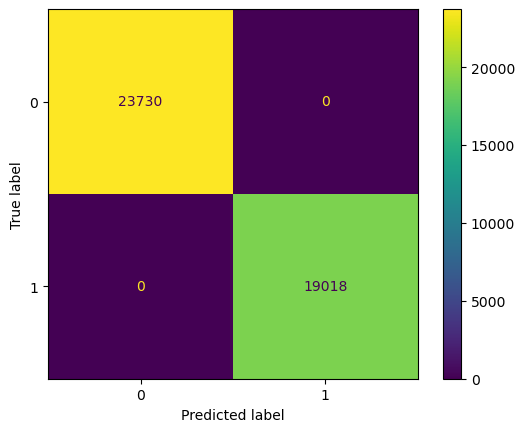

In [40]:
#Confusion Matrix for test set
conf_mat = confusion_matrix(y_train, train_forest)
cm_display = ConfusionMatrixDisplay(conf_mat).plot()

### Look at Testing Accuracy

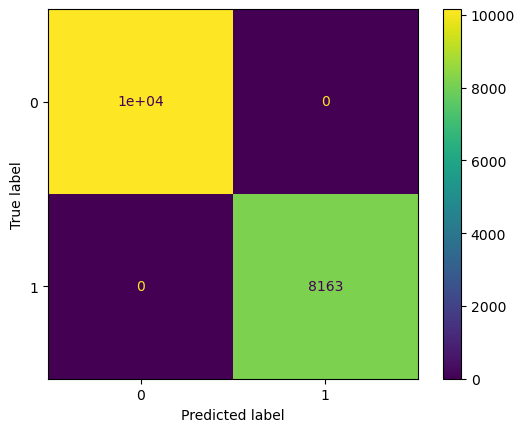

In [41]:
#Confusion Matrix for test set
conf_mat = confusion_matrix(y_test, y_forest)
cm_display = ConfusionMatrixDisplay(conf_mat).plot()

In [42]:
#train a forest and predict it
forest = RandomForestClassifier(n_estimators=100, random_state=17)
forest.fit(X_train, y_train)
y_forest, train_forest = predForModel(forest)

Accuracy train: 1.0
Accuracy test: 1.0


<p> What if we try this with 50/50 train/test split? </p>

In [43]:
X = data.drop(columns  = ["Class"])
y = data["Class"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5,
random_state=1)

In [44]:
#train a forest and predict it
forest = RandomForestClassifier(n_estimators=100, random_state=1)
forest.fit(X_train, y_train)
y_forest, train_forest = predForModel(forest)

Accuracy train: 1.0
Accuracy test: 1.0


### Look at Training Accuracy

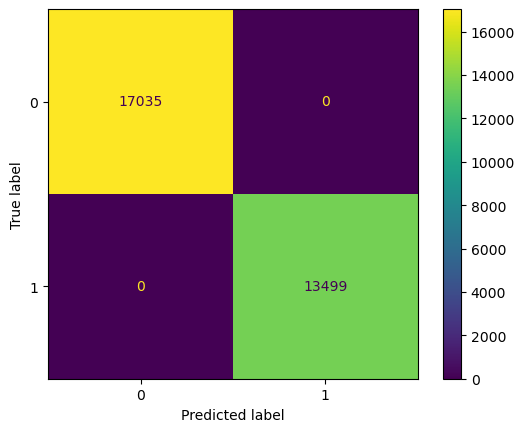

In [45]:
#Confusion Matrix for test set
conf_mat = confusion_matrix(y_train, train_forest)
cm_display = ConfusionMatrixDisplay(conf_mat).plot()

### Look at Testing Accuracy

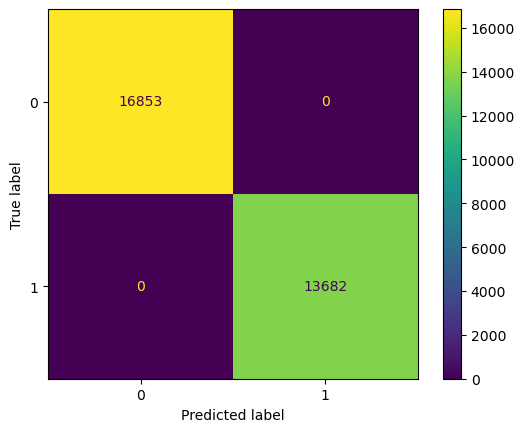

In [46]:
#Confusion Matrix for test set
conf_mat = confusion_matrix(y_test, y_forest)
cm_display = ConfusionMatrixDisplay(conf_mat).plot()

#### Let's try even less training data

In [47]:
X = data.drop(columns  = ["Class"])
y = data["Class"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.75,
random_state=1)

In [48]:
#train a forest and predict it
forest = RandomForestClassifier(n_estimators=150, random_state=1)
forest.fit(X_train, y_train)
y_forest, train_forest = predForModel(forest)

Accuracy train: 1.0
Accuracy test: 0.9999345006768263


### Look at Training Accuracy

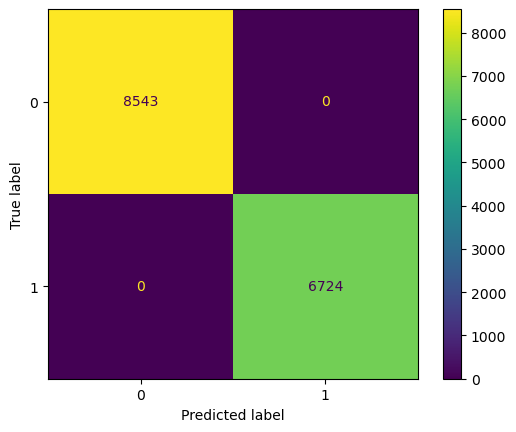

In [49]:
#Confusion Matrix for test set
conf_mat = confusion_matrix(y_train, train_forest)
cm_display = ConfusionMatrixDisplay(conf_mat).plot()

### Look at Testing Accuracy

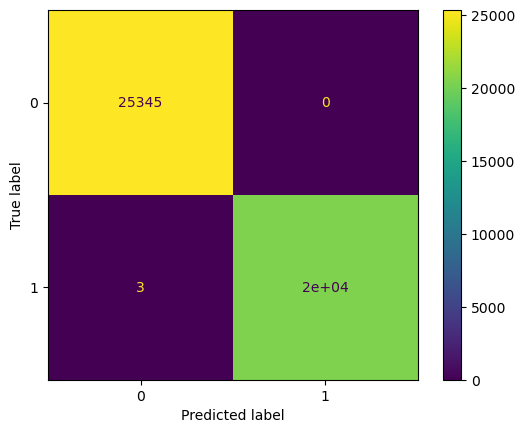

In [50]:
#Confusion Matrix for test set
conf_mat = confusion_matrix(y_test, y_forest)
cm_display = ConfusionMatrixDisplay(conf_mat).plot()

In [58]:
from sklearn import model_selection
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import LeavePOut
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
#K-fold Cross-Validation
'''
In k-fold cross-validation, the data is divided into k folds.
The model is trained on k-1 folds with one fold held back for testing.
This process gets repeated to ensure each fold of the dataset gets the
chance to be the held back set. Once the process is completed,
we can summarize the evaluation metric using the mean or/and the standard
deviation.
'''
kfold = model_selection.KFold(n_splits=10, shuffle=True)
model_kfold = RandomForestClassifier(n_estimators=100, random_state=1)
results_kfold = model_selection.cross_val_score(model_kfold, X, y, cv=kfold, scoring='f1')
print(f"Accuracy: {results_kfold.mean()} ({results_kfold.std()})")

Accuracy: 0.9999820111530852 (5.396654074475427e-05)


In [57]:
#Stratified K-fold Cross-Validation
'''
Stratified K-Fold approach is a variation of k-fold cross-validation
that returns stratified folds, i.e., each set containing approximately
the same ratio of target labels as the complete data.
'''
skfold = StratifiedKFold(n_splits=10, shuffle=True)
model_skfold = RandomForestClassifier(n_estimators=100, random_state=1)
results_skfold = model_selection.cross_val_score(model_skfold, X, y,
cv=skfold, scoring='recall')
print(f"Accuracy: {results_skfold.mean()} ({results_skfold.std()})")

Accuracy: 0.9999632082413539 (0.0001103752759381793)


In [50]:
#Repeated Random Test-Train Splits
'''
This technique is a hybrid of traditional train-test splitting and the k-fold
cross-validation method. In this technique, we create random splits of the
data
in the training-test set manner and then repeat the process of splitting and
evaluating the algorithm multiple times, just like the cross-validation
method.
'''
kfold2 = model_selection.ShuffleSplit(n_splits=10, test_size=0.30,
random_state=100)
model_shufflecv = RandomForestClassifier(n_estimators=100, random_state=1)
results_shufflecv = model_selection.cross_val_score(model_shufflecv, X, y,
cv=kfold2, scoring='recall')
print(f"Accuracy: {results_shufflecv.mean()} ({results_shufflecv.std()})")

Accuracy: 0.9999754042583799 (4.919152520399772e-05)


In [59]:
kfold2 = model_selection.ShuffleSplit(n_splits=10, test_size=0.30,
random_state=100)
model_shufflecv = RandomForestClassifier(n_estimators=150, random_state=1)
results_shufflecv = model_selection.cross_val_score(model_shufflecv, X, y,
cv=kfold2, scoring='recall')
print(f"Accuracy: {results_shufflecv.mean()} ({results_shufflecv.std()})")

Accuracy: 0.9999754042583799 (4.919152520399772e-05)


In [60]:
kfold2 = model_selection.ShuffleSplit(n_splits=10, test_size=0.50,
random_state=100)
model_shufflecv = RandomForestClassifier(n_estimators=150, random_state=1)
results_shufflecv = model_selection.cross_val_score(model_shufflecv, X, y,
cv=kfold2, scoring='recall')
print(f"Accuracy: {results_shufflecv.mean()} ({results_shufflecv.std()})")

Accuracy: 0.9999411078389994 (5.5169199760900705e-05)


In [61]:
kfold2 = model_selection.ShuffleSplit(n_splits=10, test_size=0.75,
random_state=100)
model_shufflecv = RandomForestClassifier(n_estimators=150, random_state=1)
results_shufflecv = model_selection.cross_val_score(model_shufflecv, X, y,
cv=kfold2, scoring='recall')
print(f"Accuracy: {results_shufflecv.mean()} ({results_shufflecv.std()})")

Accuracy: 0.9999166153661951 (4.41835356815755e-05)


## Random Forests are Perfect for this data...
<p>The most I could get wrong with this happened when setting the random state to a different number was only 1 or 2, and this is working for a 50/50 test train split -> implies theres a pattern trees are able to come to in general.
    <br/>
Also, with training only at 25%, this model only misclassifies 3 out of 40k pieces of data whether a mushroom is poisionus. These mushrooms are misclassified as being poisionous so it wouldn't cause any harm to anyone either way. Recall is 1.0</p>

<p> future note, maybe compare what the accuracies are like using standardized features? </p>

# Logistic Regression

In [51]:
X = data.drop(columns  = ["Class"])
y = data["Class"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.75,
random_state=1)

In [52]:
logistic_regression = make_pipeline(StandardScaler(), LogisticRegression())
logistic_regression.fit(X_train, y_train )
prediction = logistic_regression.predict(X_test)
accuracy = logistic_regression.score(X_test, y_test)
print(f"Accuracy on test set: {accuracy:.3f}")

Accuracy on test set: 0.767


In [53]:
report = classification_report(y_test, prediction)
print(report)

              precision    recall  f1-score   support

           0       0.79      0.79      0.79     25345
           1       0.74      0.74      0.74     20457

    accuracy                           0.77     45802
   macro avg       0.76      0.76      0.76     45802
weighted avg       0.77      0.77      0.77     45802



In [54]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import RidgeCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_validate
alphas = np.logspace(-7, 5, num=100)
ridge = make_pipeline(
MinMaxScaler(),
PolynomialFeatures(degree=2, include_bias=False),
RidgeCV(alphas=alphas, store_cv_values=True),
)
from sklearn.model_selection import ShuffleSplit
cv = ShuffleSplit(n_splits=5, random_state=0)
cv_results = cross_validate(
ridge,
data.drop(columns  = ["Class"]),
data["Class"],
cv=cv,
scoring="neg_mean_squared_error",
return_train_score=True,
return_estimator=True,
)

In [55]:
train_error = -cv_results["train_score"]
print(
"Mean squared error of ridge model on the train set:\n"
f"{train_error.mean():.2e} ± {train_error.std():.2e}"
)
test_error = -cv_results["test_score"]
print(
"Mean squared error of ridge model on the test set:\n"
f"{test_error.mean():.2e} ± {test_error.std():.2e}"
)

Mean squared error of ridge model on the train set:
2.38e-03 ± 8.61e-06
Mean squared error of ridge model on the test set:
2.48e-03 ± 7.83e-05


In [56]:
mse_alphas = [
est[-1].cv_values_.mean(axis=0) for est in cv_results["estimator"]
]
cv_alphas = pd.DataFrame(mse_alphas, columns=alphas)
cv_alphas = cv_alphas.aggregate(["mean", "std"]).T
cv_alphas

,mean,std
1.000000e-07,0.002516,0.000010
1.321941e-07,0.002521,0.000010
1.747528e-07,0.002528,0.000010
2.310130e-07,0.002536,0.000010
3.053856e-07,0.002546,0.000010
...,...,...
3.274549e+04,0.183823,0.000129
4.328761e+04,0.192104,0.000133
5.722368e+04,0.199886,0.000135
7.564633e+04,0.207078,0.000135


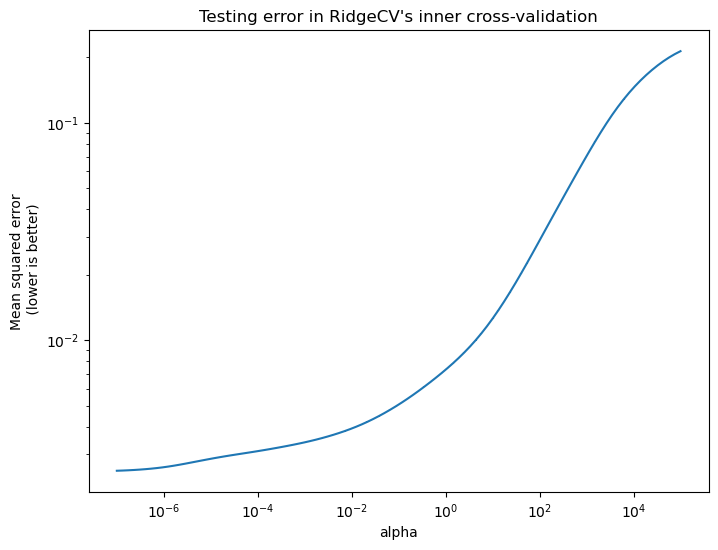

In [57]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.errorbar(cv_alphas.index, cv_alphas["mean"], yerr=cv_alphas["std"])
_ = ax.set(
xscale="log",
xlabel="alpha",
yscale="log",
ylabel="Mean squared error\n (lower is better)",
title="Testing error in RidgeCV's inner cross-validation",
)

In [58]:
best_alphas = [est[-1].alpha_ for est in cv_results["estimator"]]
best_alphas

[1e-07, 1e-07, 1e-07, 1e-07, 1e-07]

In [59]:
print(
f"Min optimal alpha: {np.min(best_alphas):.2f} and "
f"Max optimal alpha: {np.max(best_alphas):.2f}"
)

Min optimal alpha: 0.00 and Max optimal alpha: 0.00


In [62]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.linear_model import Ridge
# Step 1: Define the pipeline
pipeline = Pipeline([
('scaler', StandardScaler()), # Preprocessing step (feature scaling)
('poly_features', PolynomialFeatures(degree=2, include_bias=False)),
('ridge', Ridge(random_state= 42)) # Regression step
])
# Step 2: Set up the parameter grid
param_grid = {
'ridge__alpha': [0.1, 1, 10, 100, 1000] # Adjust the grid values as needed
}
# Step 3: Initialize GridSearchCV
grid_search = GridSearchCV(
estimator=pipeline,
param_grid=param_grid,
scoring='neg_mean_squared_error', # You can choose another scoring if needed
cv=KFold(n_splits=5, shuffle=True, random_state=42), # Cross-validation strategy
verbose=1, # For detailed logging information (use 0 for no verbosity)
)
# Step 4: Fit GridSearchCV to the data
grid_search.fit(data.drop(columns  = ["Class"]), data["Class"])
# Best parameters found
print("Best parameters found: ", grid_search.best_params_)
# Best score found
print("Best score found: ", -grid_search.best_score_) # Change sign because scoring is negative MSE
# You can also retrieve the best estimator directly
best_model = grid_search.best_estimator_

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best parameters found:  {'ridge__alpha': 0.1}
Best score found:  0.00316280654943241


In [65]:
from sklearn.model_selection import cross_val_score
# Create the pipeline with the given parameters
elasticnet_model = make_pipeline(
MinMaxScaler(),
PolynomialFeatures(degree=2, include_bias=False),
ElasticNet(alpha=0.1, l1_ratio=0.7)
)
# You can now train the model using the whole dataset
elasticnet_model.fit(data.drop(columns  = ["Class"]), data["Class"])
# Or perform cross-validation to estimate the model's performance
cv_scores = cross_validate(
elasticnet_model,
data.drop(columns  = ["Class"]),
data["Class"],
scoring='neg_mean_squared_error',
cv=5, # or any other cross-validation strategy
return_train_score=True,
return_estimator=True,
)
train_error = -cv_results["train_score"]
print(
"Mean squared error of tuned elastic model on the train set:\n"
f"{train_error.mean():.2e} ± {train_error.std():.2e}"
)
test_error = -cv_results["test_score"]
print(
"Mean squared error of tuned elastic model on the test set:\n"
f"{test_error.mean():.2e} ± {test_error.std():.2e}"
)

Mean squared error of tuned elastic model on the train set:
2.38e-03 ± 8.61e-06
Mean squared error of tuned elastic model on the test set:
2.48e-03 ± 7.83e-05
